In [1]:
import import_ipynb
from load_process_data import load_data, preprocess_data
from models import BaseGRU, MultiHeadCnnRnn
from keras.regularizers import l2
from model_eval import cross_validate
from visualize import visualize_accuracies
import os


importing Jupyter notebook from load_process_data.ipynb
importing Jupyter notebook from models.ipynb


2024-05-28 02:18:59.806790: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


importing Jupyter notebook from model_eval.ipynb
importing Jupyter notebook from visualize.ipynb


In [2]:
# Define hyperparameters

input_shape = (81, 23)  # 81 timesteps with 23 features
num_folds = 5  # Cross-validation
epochs = 10

# GRU hyperparameters

learning_rate = 0.002
dropout = 0.1
recurrent_dropout = 0.1
kernel_regularizer = l2(0.01)  # Regularization strength for kernel
recurrent_regularizer = l2(0.01)  # Regularization strength for recurrent connections

# CNN hyperparameters

kernel_sizes = [8, 5, 3]
filters = [16, 32, 64] 
learning_rate = 0.001
weight_decay = 0.01 

# Create models with regularization

GRUModel = BaseGRU(input_shape=input_shape, 
                learning_rate=learning_rate, 
                dropout=dropout, 
                recurrent_dropout=recurrent_dropout,
                kernel_regularizer=kernel_regularizer, 
                recurrent_regularizer=recurrent_regularizer)

MultiHeadModel = MultiHeadCnnRnn(input_shape=input_shape,
                                 kernel_sizes=kernel_sizes,
                                 filters=filters,
                                 learning_rate=learning_rate,
                                 weight_decay=weight_decay,
                                 dropout=dropout, 
                                 recurrent_dropout=recurrent_dropout,
                                 kernel_regularizer=kernel_regularizer, 
                                 recurrent_regularizer=recurrent_regularizer)
                                 

                                 
                

Feature amount: 23


In [3]:
# Loading data 

current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
data_path = os.path.join(parent_directory, 'data/')
train_y_list, test_y_list, train_X_list, test_X_list = load_data(data_path)

# Preprocessing data (reshape + standardization)

train_x_list_filtered, test_x_list_filtered = preprocess_data(train_X_list, test_X_list)


Loading data ...
Data shapes: 
train_x_list: (5,)
training data within each fold: (16063, 81, 25)
train_y_list: (5,)
training label within each fold: (16063,)
Preprocessing data ...


In [4]:
# BaseGRU training and testing

train_accuracies, test_accuracies = cross_validate(GRUModel, num_folds, train_x_list_filtered, 
                                                   train_y_list, test_x_list_filtered, test_y_list)


Testing on Base GRU class: 
Training on fold 1/5
Epoch 1/10
502/502 [==============================] - 20s 36ms/step - loss: 0.7579 - accuracy: 0.7106 - val_loss: 0.4957 - val_accuracy: 0.8210
Epoch 2/10
502/502 [==============================] - 17s 35ms/step - loss: 0.4992 - accuracy: 0.8233 - val_loss: 0.4496 - val_accuracy: 0.8561
Epoch 3/10
502/502 [==============================] - 17s 34ms/step - loss: 0.4794 - accuracy: 0.8379 - val_loss: 0.4506 - val_accuracy: 0.8635
Epoch 4/10
502/502 [==============================] - 17s 35ms/step - loss: 0.4641 - accuracy: 0.8477 - val_loss: 0.4115 - val_accuracy: 0.8782
Epoch 5/10
502/502 [==============================] - 17s 35ms/step - loss: 0.4540 - accuracy: 0.8570 - val_loss: 0.3913 - val_accuracy: 0.8974
Epoch 6/10
502/502 [==============================] - 20s 39ms/step - loss: 0.4524 - accuracy: 0.8569 - val_loss: 0.3978 - val_accuracy: 0.8987
Epoch 7/10
502/502 [==============================] - 17s 34ms/step - loss: 0.4543 - ac

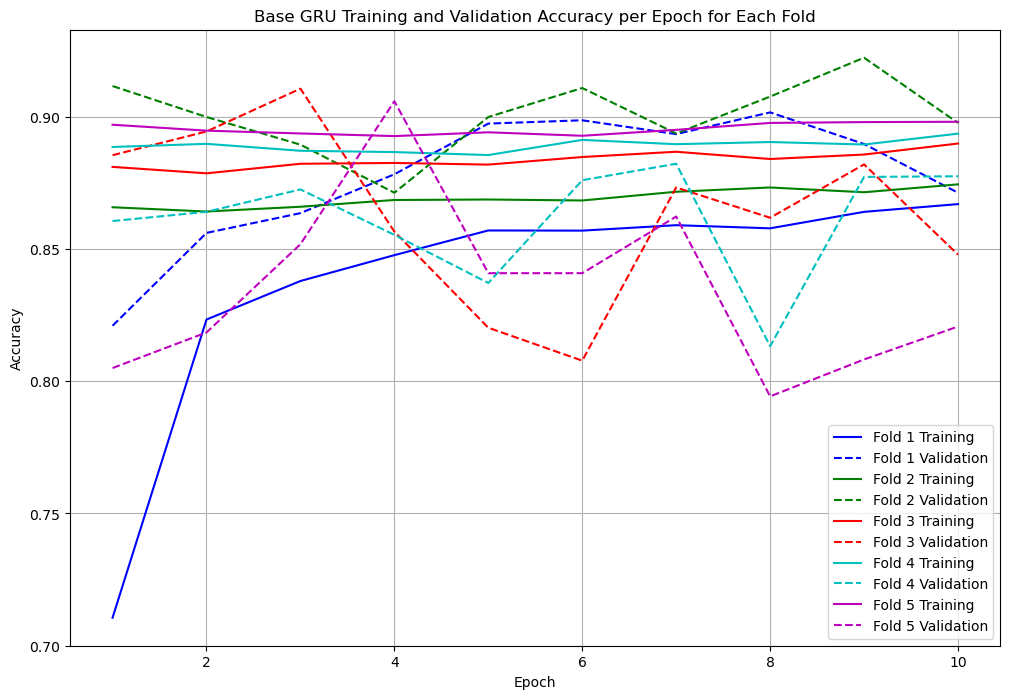

In [5]:
# BaseGRU result visualization

visualize_accuracies(GRUModel, train_accuracies, test_accuracies, epochs)

In [6]:
# MultiHead training and testing

train_accuracies, test_accuracies = cross_validate(MultiHeadModel, num_folds, train_x_list_filtered, 
                                                                              train_y_list, test_x_list_filtered, test_y_list)

Testing on Multi-head model: 
Training on fold 1/5
Epoch 1/10
126/126 [==============================] - 41s 223ms/step - loss: 6.4702 - accuracy: 0.6176 - val_loss: 1.9100 - val_accuracy: 0.4866
Epoch 2/10
126/126 [==============================] - 25s 201ms/step - loss: 0.8847 - accuracy: 0.8488 - val_loss: 1.7346 - val_accuracy: 0.4866
Epoch 3/10
126/126 [==============================] - 26s 203ms/step - loss: 0.5120 - accuracy: 0.8913 - val_loss: 1.6811 - val_accuracy: 0.4866
Epoch 4/10
126/126 [==============================] - 26s 209ms/step - loss: 0.4572 - accuracy: 0.8978 - val_loss: 1.8085 - val_accuracy: 0.4866
Epoch 5/10
126/126 [==============================] - 26s 208ms/step - loss: 0.4246 - accuracy: 0.9065 - val_loss: 1.7924 - val_accuracy: 0.4866
Epoch 6/10
126/126 [==============================] - 25s 201ms/step - loss: 0.4106 - accuracy: 0.9102 - val_loss: 1.8616 - val_accuracy: 0.4866
Epoch 7/10
126/126 [==============================] - 26s 208ms/step - loss: 0.

In [ ]:
# Mult result visualization

visualize_accuracies(GRUModel, train_accuracies, test_accuracies, epochs)